### Name: Bishoy Botros Nazim

## Mobile Price Classification Using Machine Learning

**Introduction:**
In todays market, mobile phones come in a wide range of prices, each offering different features and specifications. For consumers, selecting a mobile phone that aligns with their budget and requirements can be challenging. To assist consumers in making informed decisions, this project aims to develop a machine learning model that can classify mobile phones into different price ranges based on their features.

**Problem Statement:**
The task is to build a predictive model that can accurately classify mobile phones into predefined price ranges based on various attributes such as battery power, camera features, memory, connectivity options, and more. The dataset provided contains information about several mobile phones, including their specifications and corresponding price ranges.

**Objectives:**
1. Explore and preprocess the dataset to handle missing values, outliers, and any other data inconsistencies.
2. Perform exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (price range).
3. Select appropriate machine learning algorithms for classification and evaluate their performance using suitable metrics.
4. Fine-tune the chosen model to improve its predictive accuracy.
5. Validate the final model using cross-validation techniques to ensure its robustness.
6. Deploy the model for real-time predictions if applicable.

**Deliverables:**
1. Jupyter Notebook or Python script containing the code implementation.
2. Documentation detailing the step-by-step process, including data preprocessing, model selection, evaluation metrics, and results interpretation.
3. Visualization of key findings from EDA.
4. Trained machine learning model for mobile price classification.
5. Deployment instructions (if applicable).

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the training and test datasets
### Ectract (X_test) from testing data (excluding 'id' column) from testing data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data = test_data.drop('id', axis=1)

### Data preprocessing
### Handle missing values if any (e.g., replace with median)

In [3]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

### Exploratory Data Analysis (EDA)
**Visualize the relationship between features and target variable (price_range)**

C:\Users\bisho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


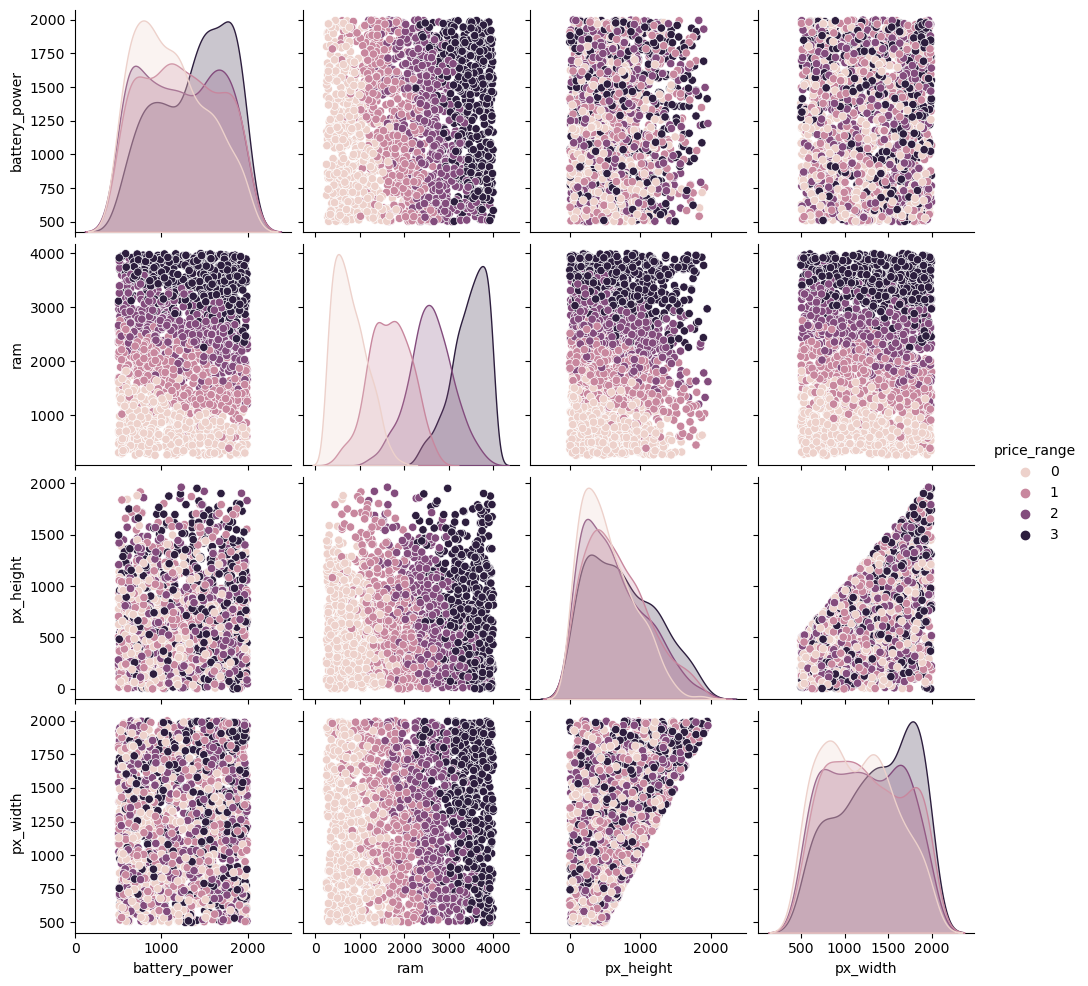

In [4]:
sns.pairplot(train_data, vars=['battery_power', 'ram', 'px_height', 'px_width'], hue='price_range')
plt.show()

### Correlation heatmap

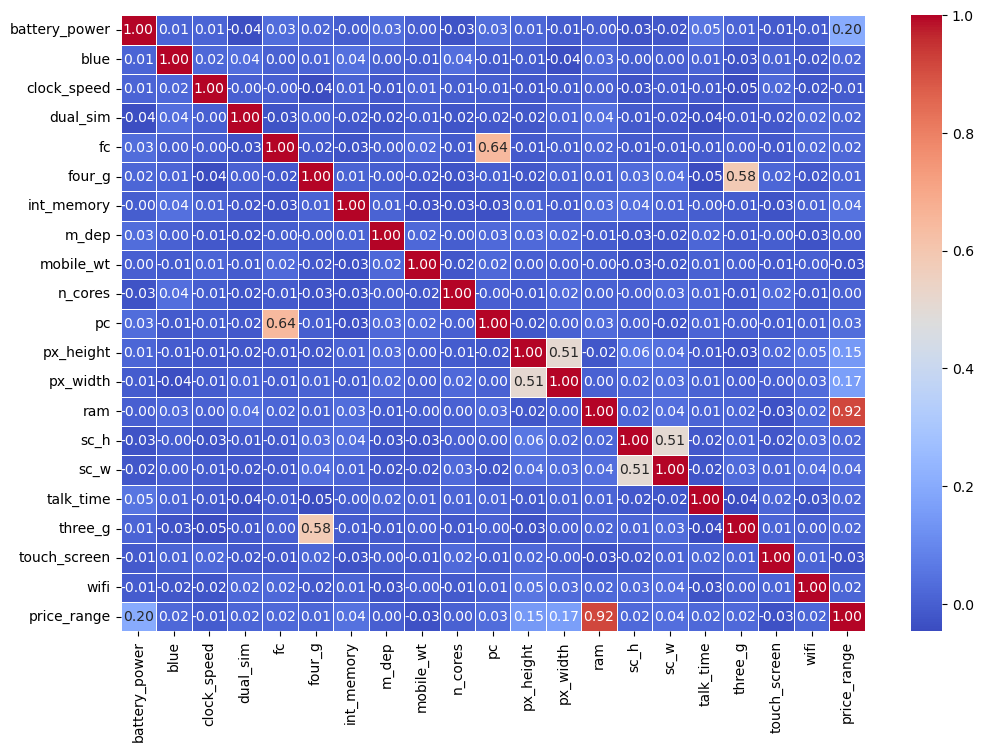

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


**Model Building**
**Split data into features (X) and target variable (y) for training and testing sets**
#### Use test dataset for final evaluation (assuming it contains similar columns

In [6]:
X_train = train_data.drop('price_range', axis=1)
y_train = train_data['price_range']
X_test = test_data

#### Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Selection: Random Forest Classifier

In [8]:
rf_model = RandomForestClassifier(random_state=42)

#### Hyperparameter tuning using GridSearchCV

In [9]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

#### Best parameters

In [10]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


#### Evaluate Model

In [11]:
best_rf_model = grid_search.best_estimator_
# Assuming you have labels for the test data (not provided in test.csv), you can predict using:
y_pred = best_rf_model.predict(X_test_scaled)

### Extract features (X_train) and target (y_train) from training data 
### Extract features (X_test) from testing data (excluding 'id' column)

In [18]:
test_data = pd.read_csv("test.csv")
X_train = train_data.drop('price_range', axis=1)
y_train = train_data['price_range']
X_test = test_data.drop('id', axis=1)

### Standardize the features using StandardScaler


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initialize and train the KNN classifier and Make predictions on the test data

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

# Create a DataFrame for the predictions with 'id' column from test data
solution_df = pd.DataFrame({'id': test_data['id'], 'price_range': y_pred})

### Save the predictions to a CSV file


In [20]:
solution_df.to_csv("Solution_MPC.csv", index=False)

In [21]:
solution_df.head()

,id,price_range
0,1,2
1,2,3
2,3,1
3,4,3
4,5,2
